# What am I Investigating?
Tennis is a racquet sport that can be played individually against a single opponent (singles) or between two teams of two players each (doubles). Players use a strung racquet to strike a hollow rubber ball, covered with felt, over a net and into the opponent's court. The objective of the game is to play the ball in such a way that the opponent cannot play a valid return. The player who is unable to return the ball will not gain a point, while the opposite player will.  
Tennis is played on different surfaces, including grass, clay, hard courts, and even indoor carpet. Each surface affects the ball's speed and bounce differently, leading to varied styles of play.  
*I'm intrested to find out if there's a relationship between the surface the match was played on and its duration*.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import skew, kurtosis

pd.set_option('display.max_columns', 50)

# Loading Data

In [2]:
folder_path = '/content/drive/MyDrive/Tennis_Analysis/full_matches_data'

# List all files in the directory with a .csv extension
all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.csv')]

# Use a list comprehension to read each file into a dataframe and then concatenate them all
combined_df = pd.concat([pd.read_csv(os.path.join(folder_path, f)) for f in all_files], ignore_index=True)

In [3]:
combined_df.sample(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
8779,1993-336,Hong Kong,Hard,32,A,19930412,10,102235,NaN,WC,Tommy Ho,L,183.0,USA,19.8,101735,NaN,NaN,Richard Fromberg,R,196.0,AUS,22.9,7-5 6-2,3,R32,81.0,3.0,2.0,53.0,32.0,26.0,13.0,10.0,1.0,2.0,5.0,3.0,59.0,31.0,25.0,9.0,10.0,4.0,8.0,120.0,349.0,74.0,565.0
52640,2005-741,Nottingham,Grass,32,A,20050613,25,103694,7.0,NaN,Olivier Rochus,R,168.0,BEL,24.3,103333,NaN,NaN,Ivo Karlovic,R,208.0,CRO,26.2,7-6(0) 6-7(3) 6-4,3,QF,131.0,2.0,3.0,94.0,62.0,54.0,20.0,17.0,1.0,1.0,26.0,9.0,108.0,68.0,57.0,18.0,17.0,4.0,5.0,36.0,921.0,59.0,655.0
71896,2012-891,Chennai,Hard,28,A,20120102,17,104534,NaN,NaN,Dudi Sela,R,175.0,ISR,26.7,105332,NaN,NaN,Benoit Paire,R,196.0,FRA,22.6,4-6 6-2 6-4,3,R16,121.0,3.0,2.0,87.0,60.0,44.0,17.0,14.0,6.0,7.0,10.0,5.0,104.0,58.0,40.0,21.0,14.0,4.0,7.0,83.0,640.0,95.0,586.0
98906,2021-8998,Great Ocean Road Open,Hard,64,A,20210201,241,104731,NaN,NaN,Kevin Anderson,R,203.0,RSA,34.7,103852,16.0,NaN,Feliciano Lopez,L,188.0,ESP,39.3,6-4 7-5,3,R64,89.0,17.0,1.0,61.0,46.0,40.0,6.0,11.0,3.0,3.0,7.0,4.0,73.0,32.0,27.0,20.0,11.0,5.0,7.0,82.0,825.0,63.0,998.0
53096,2005-D075,Davis Cup G2 R1: IRI vs KUW,Clay,4,D,20050304,2,103600,NaN,NaN,Mohammad Ghareeb,R,NaN,KUW,24.6,103875,NaN,NaN,Anoosha Shahgholi,U,NaN,IRI,23.3,7-5 7-6(5) 6-3,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,668.0,25.0,1047.0,6.0
81475,2015-404,Indian Wells Masters,Hard,96,M,20150312,32,106043,NaN,NaN,Diego Schwartzman,R,170.0,ARG,22.5,105668,NaN,NaN,Jerzy Janowicz,R,203.0,POL,24.3,6-4 3-6 7-6(3),3,R128,136.0,5.0,5.0,104.0,50.0,35.0,30.0,16.0,4.0,8.0,11.0,9.0,103.0,59.0,40.0,24.0,15.0,5.0,8.0,63.0,780.0,51.0,905.0
10223,1993-422,Cincinnati Masters,Hard,56,M,19930809,15,101736,NaN,NaN,Andre Agassi,R,180.0,USA,23.2,101774,11.0,NaN,Todd Martin,R,198.0,USA,23.0,6-3 6-7(2) 6-3,3,R64,123.0,2.0,2.0,89.0,63.0,47.0,18.0,16.0,2.0,3.0,22.0,2.0,92.0,54.0,39.0,20.0,14.0,3.0,6.0,28.0,1058.0,14.0,1526.0
81490,2015-404,Indian Wells Masters,Hard,96,M,20150312,47,104269,28.0,NaN,Fernando Verdasco,L,188.0,ESP,31.3,105902,NaN,Q,James Duckworth,R,183.0,AUS,23.1,6-2 7-6(3),3,R64,78.0,7.0,3.0,62.0,45.0,38.0,9.0,10.0,0.0,0.0,4.0,2.0,69.0,42.0,33.0,11.0,10.0,3.0,5.0,31.0,1225.0,106.0,533.0
62492,2008-D029,Davis Cup WG R1: GER vs KOR,Clay,4,D,20080208,1,104259,NaN,NaN,Philipp Kohlschreiber,R,178.0,GER,24.3,104561,NaN,NaN,Jae Sung An,R,NaN,KOR,22.6,6-2 6-2 6-2,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,1190.0,329.0,106.0
100562,2022-0416,Rome Masters,Clay,64,M,20220509,272,105227,NaN,NaN,Marin Cilic,R,198.0,CRO,33.6,111815,9.0,NaN,Cameron Norrie,L,188.0,GBR,26.7,5-7 6-2 6-1,3,R32,125.0,9.0,3.0,78.0,48.0,38.0,17.0,14.0,1.0,3.0,1.0,2.0,86.0,55.0,32.0,15.0,13.0,5.0,10.0,23.0,1650.0,11.0,3380.0


# Understanding the Big Picture

Getting the number of rows and columns in the dataset (pre-cleaning):

In [4]:
number_of_rows_pre_cleaning = combined_df.shape[0]
number_of_columns_pre_cleaning = combined_df.shape[1]

print(f"The dataset has {number_of_rows_pre_cleaning} rows and {number_of_columns_pre_cleaning} columns.")

The dataset has 104682 rows and 49 columns.


Counting the number of NA's in each column:

In [5]:
combined_df.isna().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           62282
winner_entry          91873
winner_name               0
winner_hand               9
winner_ht              2454
winner_ioc                0
winner_age                5
loser_id                  0
loser_seed            81382
loser_entry           83599
loser_name                0
loser_hand               42
loser_ht               4855
loser_ioc                 0
loser_age                18
score                     0
best_of                   0
round                     0
minutes               13036
w_ace                 10207
w_df                  10207
w_svpt                10207
w_1stIn               10207
w_1stWon              10207
w_2ndWon              10207
w_SvGms               10206
w_bpSaved             10207
w_bpFaced           

Checking if there are any duplicate rows:

In [6]:
number_of_duplicated_rows = combined_df.duplicated().sum()
print(f"There are {number_of_duplicated_rows} duplicated rows in the dataset.")

There are 0 duplicated rows in the dataset.


# Data Cleaning

Deleting matches that we don't know their statistics:

In [7]:
match_data_columns_names = ["w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced", "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced"]

combined_df.dropna(subset=match_data_columns_names, inplace=True)

combined_df[match_data_columns_names].isna().sum() # If the code above worked, the columns in the list above should have 0 NA's.

w_ace        0
w_df         0
w_svpt       0
w_1stIn      0
w_1stWon     0
w_2ndWon     0
w_SvGms      0
w_bpSaved    0
w_bpFaced    0
l_ace        0
l_df         0
l_svpt       0
l_1stIn      0
l_1stWon     0
l_2ndWon     0
l_SvGms      0
l_bpSaved    0
l_bpFaced    0
dtype: int64

Deleting unnecessary columns:

In [8]:
names_of_columns_to_drop = ["winner_seed", "winner_entry", "loser_seed", "loser_entry", "match_num"]

combined_df.drop(columns=names_of_columns_to_drop, inplace=True)

combined_df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'winner_id', 'winner_name', 'winner_hand', 'winner_ht',
       'winner_ioc', 'winner_age', 'loser_id', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

Changing the format of the dates in the tourney_date column, from `YYYYMMDD` format to `Y M D` format.

In [9]:
combined_df['tourney_date'] = pd.to_datetime(combined_df['tourney_date'], format='%Y%m%d')
combined_df['tourney_date'].head()

0   1990-12-31
1   1990-12-31
2   1990-12-31
3   1990-12-31
4   1990-12-31
Name: tourney_date, dtype: datetime64[ns]

Creating new columns:

In [10]:
# Creating a variable called "total_points" - the total points played in the match.
combined_df["total_points"] = combined_df["w_svpt"] + combined_df["l_svpt"]

combined_df.sample(7)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,total_points
87094,2017-0402,Memphis,Hard,32,A,2017-02-13,126203,Taylor Fritz,R,193.0,USA,19.2,104229,Yen Hsun Lu,R,180.0,TPE,33.5,4-6 7-6(4) 7-6(7),3,R32,129.0,12.0,1.0,111.0,66.0,50.0,26.0,17.0,2.0,3.0,15.0,4.0,100.0,67.0,58.0,19.0,17.0,5.0,5.0,114.0,513.0,59.0,780.0,211.0
100255,2022-0717,Houston,Clay,32,A,2022-04-04,126205,Tommy Paul,R,185.0,USA,24.8,105376,Peter Gojowczyk,R,185.0,GER,32.7,6-7(4) 7-6(5) 3-2 RET,3,R32,146.0,9.0,6.0,110.0,71.0,54.0,19.0,15.0,7.0,9.0,6.0,4.0,95.0,45.0,34.0,30.0,14.0,7.0,9.0,34.0,1298.0,101.0,686.0,205.0
95669,2020-0499,Delray Beach,Hard,32,A,2020-02-17,200005,Ugo Humbert,L,188.0,FRA,21.6,200175,Miomir Kecmanovic,R,183.0,SRB,20.4,6-4 7-6(6),3,R16,102.0,9.0,5.0,83.0,51.0,39.0,14.0,11.0,8.0,10.0,7.0,2.0,63.0,34.0,27.0,15.0,11.0,1.0,4.0,44.0,1086.0,50.0,999.0,146.0
68698,2010-337,Vienna,Hard,28,A,2010-10-25,103582,Michael Berrer,L,193.0,GER,30.3,104571,Marcos Baghdatis,R,183.0,CYP,25.3,5-7 6-1 6-4,3,QF,112.0,6.0,2.0,73.0,43.0,37.0,20.0,15.0,0.0,1.0,4.0,3.0,88.0,48.0,35.0,21.0,14.0,7.0,10.0,53.0,915.0,20.0,1830.0,161.0
2002,1991-540,Wimbledon,Grass,128,G,1991-06-24,100529,Kevin Curren,R,185.0,USA,33.3,101174,Fernando Roese,R,190.0,BRA,25.8,6-3 6-3 6-1,5,R128,80.0,12.0,4.0,62.0,34.0,31.0,19.0,13.0,2.0,3.0,2.0,5.0,78.0,50.0,25.0,15.0,12.0,3.0,9.0,55.0,588.0,144.0,247.0,140.0
102356,2023-9900,United Cup,Hard,18,A,2023-01-02,127339,Borna Gojo,R,196.0,CRO,24.8,105173,Adrian Mannarino,L,183.0,FRA,34.5,7-6(5) 3-6 7-6(5),3,RR,170.0,14.0,4.0,110.0,72.0,57.0,17.0,16.0,1.0,4.0,9.0,1.0,104.0,63.0,51.0,21.0,17.0,3.0,5.0,144.0,381.0,46.0,946.0,214.0
6274,1992-475,San Marino,Clay,32,A,1992-07-27,101532,Francisco Clavet,L,183.0,ESP,23.7,101147,Claudio Mezzadri,R,180.0,SUI,27.1,6-0 6-1,3,R16,65.0,1.0,2.0,41.0,17.0,15.0,13.0,6.0,2.0,2.0,1.0,3.0,48.0,22.0,9.0,9.0,7.0,5.0,11.0,23.0,1112.0,85.0,477.0,89.0


Getting the number of rows and columns in the dataset (post-cleaning):

In [11]:
number_of_rows_post_cleaning = combined_df.shape[0]
number_of_columns_post_cleaning = combined_df.shape[1]

print(f"The dataset has {number_of_rows_post_cleaning} rows and {number_of_columns_post_cleaning} columns.")
print(f"{number_of_rows_pre_cleaning-number_of_rows_post_cleaning} rows were deleted and {number_of_columns_pre_cleaning-number_of_columns_post_cleaning} were removed.")

The dataset has 94475 rows and 45 columns.
10207 rows were deleted and 4 were removed.


Creating a subset used in the multivariate analysis:

In [12]:
col_names_multivariate_df = ["w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced", "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced", "winner_ht", "winner_age", "loser_ht", "loser_age", "minutes"]

multivariate_analysis_df = combined_df[col_names_multivariate_df]

multivariate_analysis_df.head()

,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_ht,winner_age,loser_ht,loser_age,minutes
0,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,193.0,20.7,190.0,23.1,130.0
1,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,198.0,27.4,178.0,24.6,119.0
2,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,190.0,24.8,183.0,23.0,71.0
3,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,178.0,19.7,180.0,20.8,85.0
4,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,185.0,24.4,188.0,19.9,90.0


# Univariate Analysis

## Categorical Variables

### Surface Type

Counting the number of games played on each surface:

In [13]:
combined_df["surface"].value_counts()

Hard      47729
Clay      31085
Grass      9783
Carpet     5878
Name: surface, dtype: int64

Proportion of matches played on each surface:

In [14]:
combined_df["surface"].value_counts(normalize=True)

Hard      0.505202
Clay      0.329029
Grass     0.103551
Carpet    0.062218
Name: surface, dtype: float64

Plotting the number of games played on each surface type:

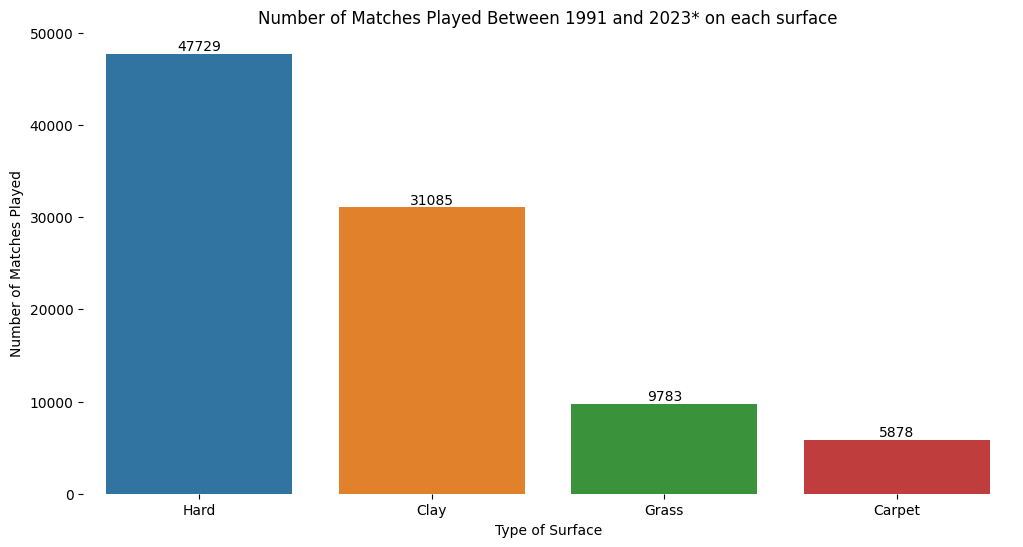

In [15]:
plt.figure(figsize=(12,6))
surfaces_countplot = sns.countplot(data=combined_df, x="surface", order=combined_df.surface.value_counts().index)
sns.despine(left=True, bottom=True)
surfaces_countplot.bar_label(surfaces_countplot.containers[0], label_type='edge')
surfaces_countplot.set_xlabel("Type of Surface")
surfaces_countplot.set_ylabel("Number of Matches Played")
surfaces_countplot.set_title("Number of Matches Played Between 1991 and 2023* on each surface")
plt.show()

### Best of 5 VS Best of 3:

Counting the number of best of 5 and best of 3 matches played:

In [16]:
combined_df["best_of"].value_counts()

3    77549
5    16926
Name: best_of, dtype: int64

Proportion of each best of- match:

In [17]:
combined_df["best_of"].value_counts(normalize=True)

3    0.820841
5    0.179159
Name: best_of, dtype: float64

Plotting the number of best of 5 and best of 3 matches played:

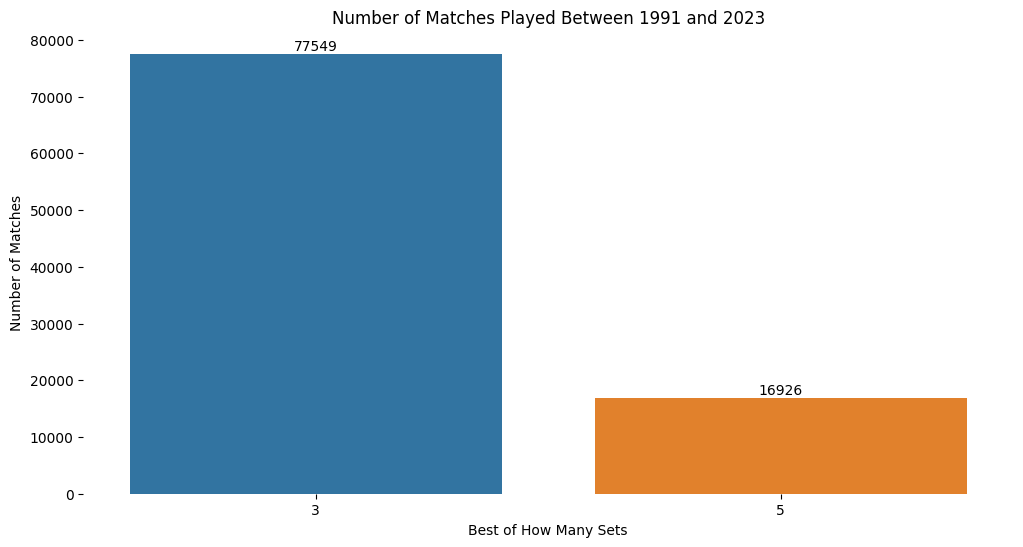

In [18]:
plt.figure(figsize=(12,6))
best_of_countplot = sns.countplot(data=combined_df, x="best_of", order=combined_df.best_of.value_counts().index)
sns.despine(left=True, bottom=True)
best_of_countplot.bar_label(best_of_countplot.containers[0], label_type='edge')
best_of_countplot.set_xlabel("Best of How Many Sets")
best_of_countplot.set_ylabel("Number of Matches")
best_of_countplot.set_title("Number of Matches Played Between 1991 and 2023")
plt.show()

In [ ]:
combined_df.winner_hand.value_counts()

In [ ]:
combined_df.loser_hand.value_counts()

## Numerical Variables

### Analyzing the total_points variable:

Descriptive statistics:

In [20]:
round(combined_df.total_points.describe(), 3)

count    94475.000
mean       159.096
std         57.433
min          1.000
25%        116.000
50%        148.000
75%        191.000
max        980.000
Name: total_points, dtype: float64

Skewness and Kurtosis:

In [ ]:
total_points_skewness = combined_df.total_points.skew()
total_points_kurtosis = combined_df.total_points.kurtosis()

print(f"Skewness: {round(total_points_skewness, 3)}")
print(f"Kurtosis: {round(total_points_kurtosis, 3)}")

Plotting:

In [ ]:
plt.figure(figsize=(12, 6))
total_point_histogram = sns.histplot(data=combined_df, x="total_points")
sns.despine(left=True, bottom=True)
total_point_histogram.set_xlabel("Total Number of Points Played in a Match")
total_point_histogram.set_ylabel("Number of Matches")
plt.show()

### Analyzing the winner_age variable:

Descriptive statistics:

In [ ]:
combined_df["winner_age"].describe()

Skewness and Kurtosis:

In [ ]:
winner_age_skewness = combined_df["winner_age"].skew()
winner_age_kurtosis = combined_df["winner_age"].kurtosis()

print(f"Skewness: {round(winner_age_skewness, 3)}")
print(f"Kurtosis: {round(winner_age_kurtosis, 3)}")

Plotting:

In [ ]:
plt.figure(figsize=(12, 6))
winner_age_histogram = sns.histplot(data=combined_df, x="winner_age")
sns.despine(left=True, bottom=True)
winner_age_histogram.set_xlabel("Winners Age")
winner_age_histogram.set_ylabel("Number of Players")
winner_age_histogram.set_title("Winners Age Distribution")
plt.show()

# Multivariate Analysis

Creating a pairplot visualization:

In [ ]:
pairplot = sns.pairplot(multivariate_analysis_df, corner=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Creating a correlation matrix:

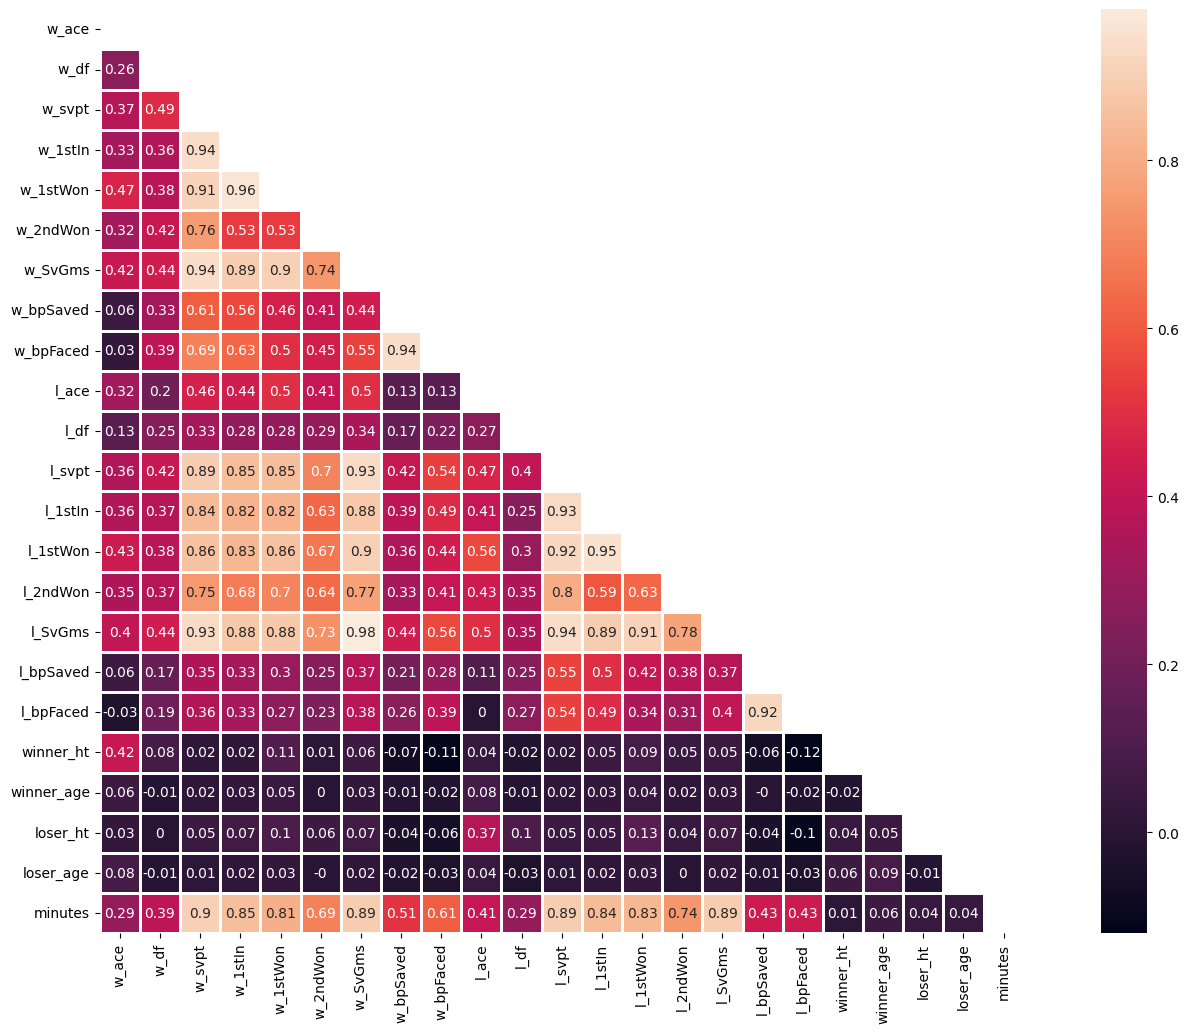

In [21]:
corr_matrix = round(multivariate_analysis_df.corr(),2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True, mask=mask, square=True, linewidths=2)
plt.show()

### Comparing the average number of total points played on each surfce

Calculating each group's average:

In [22]:
total_points_mean_by_surface_df = round(combined_df.groupby(["surface"], as_index=False)[["total_points"]].mean(), 2)
total_points_mean_by_surface_df.sort_values(by="total_points", ascending=False, inplace=True, ignore_index=True)
total_points_mean_by_surface_df

,surface,total_points
0,Grass,182.54
1,Hard,158.72
2,Clay,154.60
3,Carpet,146.93


Plotting:

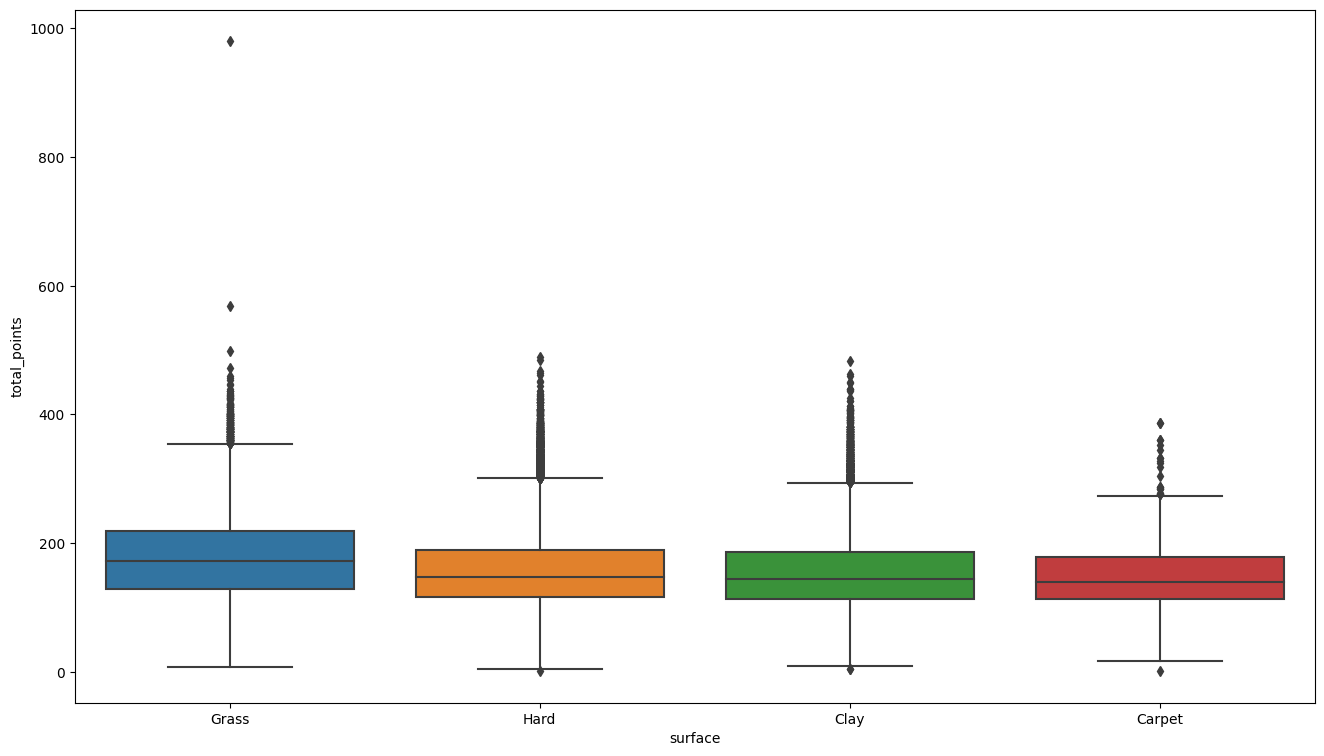

In [ ]:
plt.figure(figsize=(16,9))
sns.boxplot(combined_df, x="surface", y="total_points", order=total_points_mean_by_surface_df["surface"])
plt.show()